In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
np.random.seed(42)
values=np.random.rand(100)
labels=[]
for i in values[:50]:
    if i<=0.5:
        labels.append('Class1')
    else:
        labels.append('Class2')
labels+=[None]*50
print(labels)

['Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [19]:
data={"point":[f"x{i+1}" for i in range(100)],
      "Value":values,
      "Label":labels
}
print(data)
type(data)

{'point': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100'], 'Value': array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 

dict

In [20]:
 df=pd.DataFrame(data)
df.head()

,point,Value,Label
0,x1,0.374540,Class1
1,x2,0.950714,Class2
2,x3,0.731994,Class2
3,x4,0.598658,Class2
4,x5,0.156019,Class1


In [21]:
df.nunique()

point    100
Value    100
Label      2
dtype: int64

In [22]:
df.shape

(100, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   point   100 non-null    object 
 1   Value   100 non-null    float64
 2   Label   50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100.0,0.470181,0.297489,0.005522,0.193201,0.464142,0.730203,0.986887


In [25]:
df.isnull().sum()

point     0
Value     0
Label    50
dtype: int64

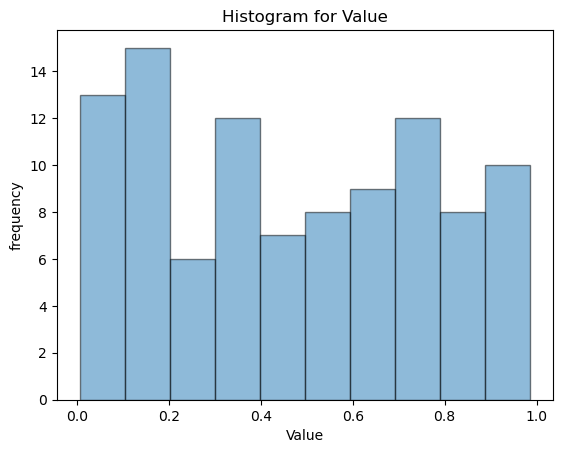

In [26]:
num_col=df.select_dtypes(include=['int','float']).columns
for col in num_col:
    df[col].hist(bins=10,alpha=0.5,edgecolor='black',grid=False)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

In [48]:
labeled_df=df[df["Label"].notna()]
X_train=labeled_df[["Value"]]
Y_train=labeled_df["Label"]
unlabeled_df=df[df["Label"].isna()]
X_test=unlabeled_df[["Value"]]



In [49]:
true_labels=["Class1" if x<=0.5 else "Class2" for x in values[50:]]

In [53]:
k_values=[1,2,3,4,5,20,30]
results={}
accuracies={}
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predictions=knn.predict(X_test)
    results[k]=predictions

In [54]:
accuracy=accuracy_score(true_labels,predictions)*100
accuracies[k]=accuracy
print(f"Accuracy for k={k}:{accuracy:.2f}%")
unlabeled_df[f"Label_k{k}"]=predictions

Accuracy for k=30:100.00%


In [55]:
print(predictions)

['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']


In [56]:
df1=unlabeled_df.drop(columns=['Label'],axis=1)

In [57]:
df1

,point,Value,Label_k30
50,x51,0.969585,Class2
51,x52,0.775133,Class2
52,x53,0.939499,Class2
53,x54,0.894827,Class2
54,x55,0.597900,Class2
55,x56,0.921874,Class2
56,x57,0.088493,Class1
57,x58,0.195983,Class1
58,x59,0.045227,Class1
59,x60,0.325330,Class1


In [47]:
print("\n Accuracies for different k values:")
for k,acc in accuracies.items():
    print(f"k={k}:{acc:.2f}%")


 Accuracies for different k values:
k=30:100.00%
